In [560]:
import os
os.environ['DJANGO_SETTINGS_MODULE'] = 'ClusterCast.settings'
import test_utils
import django
django.setup()
import sys
sys.path.append("/home/ajp031/StockDeepLearning/ClusterCast/ClusterCast")
from asgiref.sync import sync_to_async
from importlib import reload
import ClusterPipeline.models.ClusterProcessing as cp
import ClusterPipeline.models.SequencePreprocessing as sp
import ClusterPipeline.models.TSeriesPreproccesing as tsp
from copy import deepcopy
import numpy as np
from tensorflow.keras.backend import clear_session
import random
from tensorflow.keras.optimizers import Adam
import paper_utils
import tensorflow as tf
import seaborn as sns

In [561]:
reload(tsp)

<module 'ClusterPipeline.models.TSeriesPreproccesing' from '/home/ajp031/ClusterCastProd/ClusterPipeline/models/TSeriesPreproccesing.py'>

In [598]:
tickers = ['aapl', 'msft', 'tsla', 'f']
start_date = '2007-01-01'
end_date = '2024-01-01'
steps = 75 
cluster_features = ['close', 'ema50']
target_features = ['pctChgclose+{}_target'.format(i) for i in range(1, 15) ]
interval = '1d'

In [599]:
training_features = ['pctChgclose', 'pctChgVix', 'pctChgvolume', 'hiLo','opCl', 'pctChgClHi', 'pctChgClOp',
                     "pctDiff+ema50_close", 'deriv+ema50','pctDiff+smaVol5_volume', 'macd_diff','stoch_d', 'pctDiff+ema200_close',
                     "pctDiff+bb_high_low20", 'pctDiff+bb_high_close20', 'pctDiff+bb_low_close20',]

# training_features = ['open', 'high', 'low', 'close','volume', 'Vix', 'ema10', 'ema20','ema50','ema100']

In [600]:
scaling_dict = {
    "price_vars": sp.ScalingMethod.SBSG,
    "trend_vars": sp.ScalingMethod.SBSG,
    "pctChg_vars": sp.ScalingMethod.STANDARD,
    "rolling_vars": sp.ScalingMethod.STANDARD,
    "target_vars": sp.ScalingMethod.STANDARD,
    "lag_feature_vars": sp.ScalingMethod.STANDARD,
    "momentum_vars": sp.ScalingMethod.STANDARD,
}

In [601]:
group_params = cp.StockClusterGroupParams(
    tickers=tickers,
    start_date=start_date,
    end_date=end_date,
    n_steps=steps,
    cluster_features=cluster_features,
    target_cols=target_features,
    interval=interval,
    training_features=training_features,
)

In [602]:
group_params.set_scaling_dict(scaling_dict)
group_params.initialize() 

In [603]:
data_sets = []
for ticker in tickers:
    data_set = tsp.StockDataSet(group_params, ticker)
    data_set.preprocess_pipeline(to_train = True)
    data_sets.append(data_set)

group_params = data_sets[0].group_params

group_params.data_sets = data_sets   

Creating and Processing Dataset
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Empty DataFrame
Columns: []
Index: [2007-01-03 00:00:00]
Momentum Features Created
Scaling Standard
Scaling Quant Min Max Features
Quant Min Max Features Scaled
RandomForest Compete
Dataset Preprocessing Complete
Creating and Processing Dataset
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Empty DataFrame
Columns: []
Index: [2007-01-03 00:00:00]
Momentum Features Created
Scaling Standard
Scaling Quant Min Max Features
Quant Min Max Features Scaled
RandomForest Compete
Dataset Preprocessing Complete
Creating and Processing Dataset
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Empty DataFrame
Columns: []
Index: [2010-06-29 00:00:00]
Momentu

In [604]:
data_sets[0].training_df[target_features].describe()

,pctChgclose+1_target,pctChgclose+2_target,pctChgclose+3_target,pctChgclose+4_target,pctChgclose+5_target,pctChgclose+6_target,pctChgclose+7_target,pctChgclose+8_target,pctChgclose+9_target,pctChgclose+10_target,pctChgclose+11_target,pctChgclose+12_target,pctChgclose+13_target,pctChgclose+14_target
count,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03,3.422000e+03
mean,-3.065581e-09,-1.114757e-09,-2.229513e-09,-2.786892e-10,4.459026e-09,8.360675e-10,-8.360675e-10,2.229513e-09,-2.508203e-09,-5.573783e-10,-4.459026e-09,1.672135e-09,2.786892e-10,5.573783e-10
std,1.000147e+00,1.000146e+00,1.000146e+00,1.000146e+00,1.000147e+00,1.000146e+00,1.000146e+00,1.000147e+00,1.000146e+00,1.000147e+00,1.000146e+00,1.000146e+00,1.000146e+00,1.000145e+00
min,-8.857493e+00,-8.856121e+00,-8.856101e+00,-8.852653e+00,-8.869647e+00,-8.875177e+00,-8.875909e+00,-8.876578e+00,-8.878122e+00,-8.880176e+00,-8.892574e+00,-8.885633e+00,-8.887062e+00,-8.887444e+00
25%,-4.447763e-01,-4.448301e-01,-4.451241e-01,-4.463532e-01,-4.465302e-01,-4.463970e-01,-4.447107e-01,-4.441164e-01,-4.439494e-01,-4.434817e-01,-4.450817e-01,-4.455261e-01,-4.455415e-01,-4.456203e-01
50%,-1.162441e-02,-1.227948e-02,-1.126403e-02,-1.208824e-02,-1.139654e-02,-1.097068e-02,-1.113641e-02,-1.127662e-02,-1.102185e-02,-1.003112e-02,-9.678300e-03,-9.914894e-03,-9.551140e-03,-9.614157e-03
75%,4.954831e-01,4.955057e-01,4.957843e-01,4.961162e-01,4.978246e-01,4.985929e-01,4.984597e-01,4.983499e-01,4.980987e-01,4.978586e-01,4.978847e-01,4.973096e-01,4.983438e-01,4.982991e-01
max,6.762229e+00,6.762362e+00,6.761800e+00,6.760044e+00,6.774283e+00,6.779272e+00,6.779540e+00,6.779805e+00,6.781437e+00,6.782412e+00,6.789746e+00,6.782976e+00,6.783273e+00,6.783454e+00


In [605]:
sequence_set = sp.StockSequenceSet(group_params)

In [606]:
sequence_set.preprocess_pipeline(add_cuma_pctChg_features = False)

Creating Sequences
Scaling Sequences
Scaling Sequences Complete
Sequence Preprocessing Complete


In [607]:
training_seq_elements = group_params.train_seq_elements
test_seq_elements = group_params.test_seq_elements

In [608]:
X_train, y_train = sp.SequenceElement.create_array(training_seq_elements)
X_test, y_test = sp.SequenceElement.create_array(test_seq_elements)

In [ ]:
X_feature_dict = group_params.X_feature_dict
y_feature_dict = group_params.y_feature_dict

In [ ]:
X_train_filtered = paper_utils.filter_by_features(X_train,training_features, X_feature_dict)
X_test_filtered = paper_utils.filter_by_features(X_test,training_features, X_feature_dict)
y_train_filtered = paper_utils.filter_y_by_features(y_train,target_features, y_feature_dict)
y_test_filtered = paper_utils.filter_y_by_features(y_test,target_features, y_feature_dict)

-0.0020318701352822193
1.0033223310597272


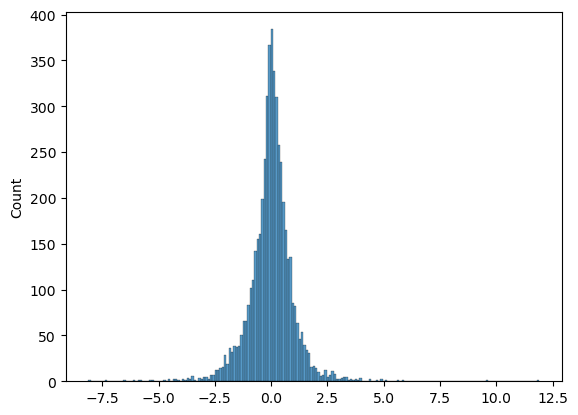

In [ ]:
# hist of y_test_filtered[:,0]

sns.histplot(y_train_filtered[:,0])
print(y_train_filtered[:,0].mean())
print(y_train_filtered[:,0].std())

In [ ]:
def convert_to_probability_distribution(target_values, output_steps, window_size=10):
    """
    Convert target values to a probability distribution with dynamic rolling variance.
    
    Args:
        target_values (numpy.ndarray): The target values for each sequence.
        output_steps (int): The number of output steps in the sequence.
        window_size (int): The size of the rolling window for variance calculation.
    
    Returns:
        numpy.ndarray: The probability distribution with mean and rolling variance.
    """
    # Initialize the probability distribution
    probability_distribution = np.zeros((len(target_values), output_steps, 2))
    
    # Loop through each sequence
    for i, sequence in enumerate(target_values):
        # Calculate rolling variance for the sequence
        # For simplicity, let's calculate variance from the start of the sequence to each j
        # This is not a fixed-size rolling window due to the accumulation of points
        for j in range(output_steps):
            if j < window_size:
                # Use the available portion of the window
                variance = np.var(sequence[:j+1], ddof=1) if j > 0 else 1  # Default variance as 1 if not enough points
            else:
                # Use a fixed window size for variance calculation
                variance = np.var(sequence[(j-window_size+1):j+1], ddof=1)
            mean = sequence[j]
            probability_distribution[i, j, 0] = mean
            probability_distribution[i, j, 1] = variance

    return probability_distribution

In [ ]:
window_size = 75
y_train_prob = convert_to_probability_distribution(y_train_filtered, y_train_filtered.shape[1], window_size=window_size)
y_test_prob = convert_to_probability_distribution(y_test_filtered, y_test_filtered.shape[1], window_size=window_size)

In [ ]:
total_cluster = paper_utils.Cluster(-1, X_train_filtered, y_train_prob, X_test_filtered, y_test_prob, training_seq_elements, test_seq_elements)

In [ ]:
import test_utils_models
reload(paper_utils)
reload(test_utils_models)

<module 'test_utils_models' from '/home/ajp031/ClusterCastProd/test_utils_models.py'>

In [ ]:
print(y_test_prob.shape)

(1226, 14, 2)


In [ ]:
y_train_prob.shape

(5158, 14, 2)

In [ ]:
prob_model = test_utils_models.CustomSeq2SeqModelProb(len(target_features), X_train_filtered.shape[1], X_train_filtered.shape[2])

In [ ]:
lr = 0.0001
batch_size = 64
epochs = 250
loss = test_utils_models.gaussian_log_likelihood_with_true_variance

In [ ]:
prob_model.compile(optimizer = Adam(learning_rate=lr, clipvalue=1.0), loss = loss)

In [ ]:
print(total_cluster.y_train.shape)

(5158, 14, 2)


In [ ]:
total_cluster.train_model(prob_model, epochs, batch_size)

Epoch 1/250


(None, 75, 64)
ENCODER OUTPUT SHAPE
(None, 75, 64)


2024-04-21 22:08:19.185347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-21 22:08:19.188124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-21 22:08:19.190186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

BEFORE
(None, 2)
decoder_output
(None, 14, 2)
(None, 75, 64)
ENCODER OUTPUT SHAPE
(None, 75, 64)


2024-04-21 22:08:23.731333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-21 22:08:23.733664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-21 22:08:23.735927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

BEFORE
(None, 2)
decoder_output
(None, 14, 2)
81/81 [==============================] - ETA: 0s - loss: 2.3504(None, 75, 64)
ENCODER OUTPUT SHAPE
(None, 75, 64)


2024-04-21 22:08:33.825117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-21 22:08:33.827504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-21 22:08:33.829142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

BEFORE
(None, 2)
decoder_output
(None, 14, 2)
Attention Weights Shape:  (None, 14, 75)
81/81 [==============================] - 17s 66ms/step - loss: 2.3504 - val_loss: 1.9053
Epoch 2/250
81/81 [==============================] - 3s 38ms/step - loss: 1.9260 - val_loss: 1.8699
Epoch 3/250
81/81 [==============================] - 3s 38ms/step - loss: 1.8160 - val_loss: 1.8609
Epoch 4/250
81/81 [==============================] - 3s 38ms/step - loss: 1.7980 - val_loss: 1.8360
Epoch 5/250
81/81 [==============================] - 3s 38ms/step - loss: 1.7785 - val_loss: 1.8122
Epoch 6/250
81/81 [==============================] - 3s 38ms/step - loss: 1.7596 - val_loss: 1.7868
Epoch 7/250
81/81 [==============================] - 3s 38ms/step - loss: 1.7437 - val_loss: 1.7676
Epoch 8/250
81/81 [==============================] - 3s 38ms/step - loss: 1.7302 - val_loss: 1.7413
Epoch 9/250
81/81 [==============================] - 3s 39ms/step - loss: 1.7171 - val_loss: 1.7196
Epoch 10/250
81/81 [====

In [ ]:
predictions, attention_weights = total_cluster.model.predict(total_cluster.X_test)

(None, 75, 64)
ENCODER OUTPUT SHAPE
(None, 75, 64)


2024-04-21 22:10:52.083849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-21 22:10:52.085788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-21 22:10:52.087260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

BEFORE
(None, 2)
decoder_output
(None, 14, 2)
Attention Weights Shape:  (None, 14, 75)
39/39 [==============================] - 3s 17ms/step


In [ ]:
predicted_mean, predicted_variance = tf.split(predictions, 2, axis=-1)
predicted_mean = predicted_mean.numpy().reshape(-1, predicted_mean.shape[1]) 
predicted_variance = predicted_variance.numpy().reshape(-1, predicted_variance.shape[1])
print(predicted_mean.shape)
print(predicted_variance.shape)

(1226, 14)
(1226, 14)


In [ ]:
predicted_y_means_transformed = np.zeros_like(predicted_mean)
predicted_y_vars_transformed = np.zeros_like(predicted_variance)
y_test_means = np.zeros_like(predicted_mean)
y_test_vars = np.zeros_like(predicted_variance)

for i, feature in enumerate(target_features):
    scaler = [feature_set for feature_set in group_params.y_feature_sets if feature == feature_set.name][0].scaler
    predicted_y_means_transformed[:,i] = scaler.inverse_transform(predicted_mean[:,i].reshape(-1,1)).reshape(-1)
    predicted_y_vars_transformed[:,i] = predicted_variance[:,i] * (scaler.scale_**2)
    y_test_means[:,i] = scaler.inverse_transform(y_test_prob[:,i,0].reshape(-1,1)).reshape(-1)
    y_test_vars[:,i] = y_test_prob[:,i,1] * (scaler.scale_**2)

<Axes: ylabel='Count'>

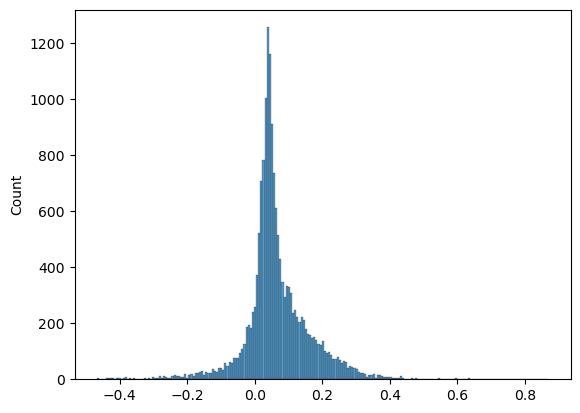

In [ ]:
import matplotlib.pyplot as plt
sns.histplot(predicted_y_means_transformed.flatten())

<Axes: ylabel='Count'>

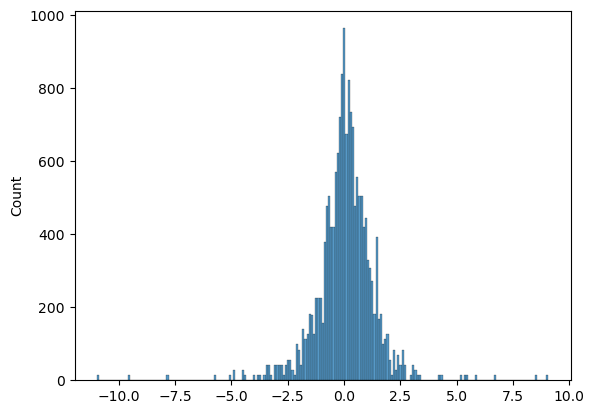

In [ ]:
sns.histplot(y_test_means.flatten())

<Axes: ylabel='Count'>

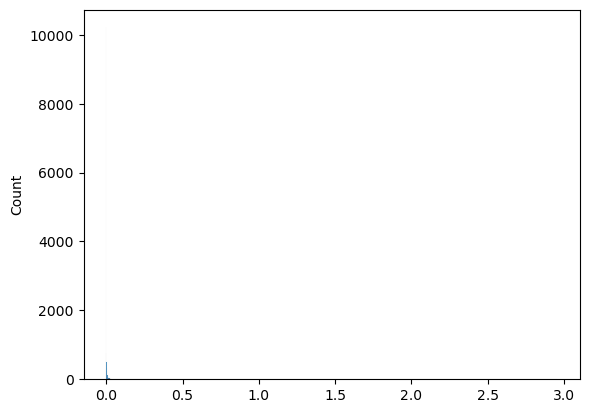

In [ ]:
sns.histplot(predicted_y_vars_transformed.flatten())

<Axes: ylabel='Count'>

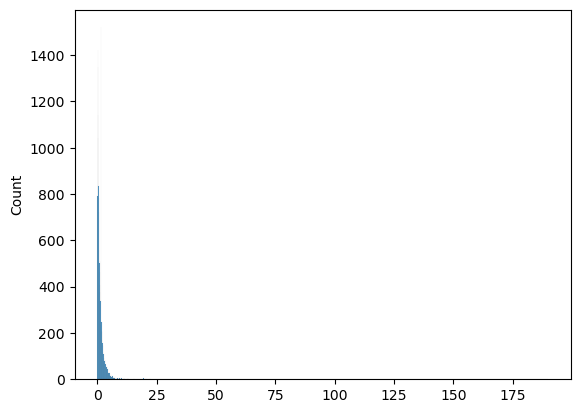

In [ ]:
sns.histplot(y_test_vars.flatten())

Predicted Variance [0.02382151 0.00798616 0.00410091 0.00267554 0.00191946 0.00142269
 0.00107051 0.00081747 0.00063624 0.00050693 0.0004142  0.00034729
 0.00029864 0.00026292]
Predicted Means [0.07687744 0.07699645 0.08298137 0.08562612 0.09269858 0.10165159
 0.10821621 0.11034982 0.10931776 0.10636521 0.10139718 0.09580138
 0.09046064 0.08584317]
Actual move [ 0.38363475 -0.09349433 -0.00336317 -0.37215567 -0.16769205 -0.65495032
  0.07682768  0.88287449 -2.00286055 -0.44549847  1.34534764  1.96973395
 -0.66298068 -1.1102581  -1.03874791  1.48995435 -0.43008745  1.13955557
  0.04197516  0.91157615  0.30089074  0.57101017 -0.07739858 -0.05797679
  0.11074763 -1.66801465 -0.31162193  0.19825757 -0.00596075 -0.57817566
  0.4456616   0.68465155 -2.0317564  -0.15059541  0.30175969 -0.31443179
  0.051874    1.11579585  0.62299401 -0.62362778  1.34534764  1.72490323
  1.62395775  1.56548285  1.38434088  1.28033423  1.03827262  1.81658745
  1.56015635  1.86918616  1.84018636  1.96899819  1.8

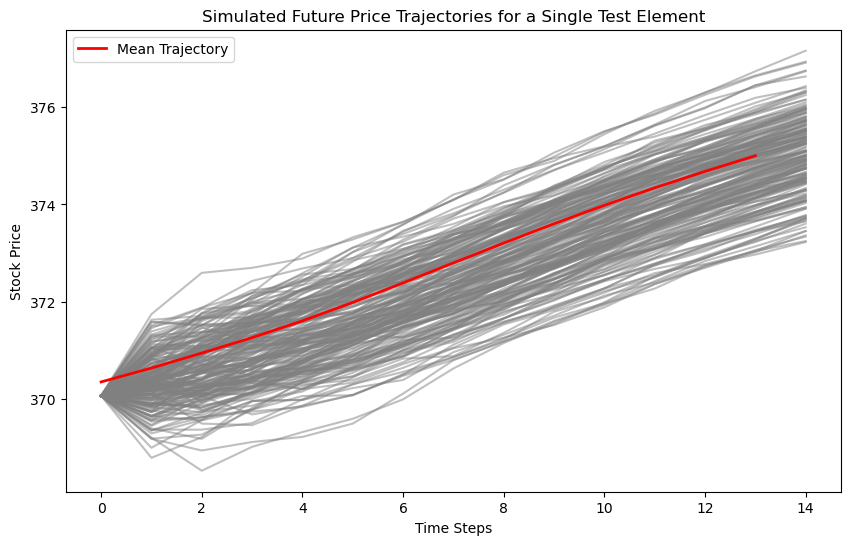

In [ ]:

i = 500
num_simulations = 200
test_element = test_seq_elements[i]
predicted_means = predicted_y_means_transformed[i]
predicted_vars = predicted_y_vars_transformed[i]

print("Predicted Variance",predicted_vars)
print("Predicted Means",predicted_means)
print("Actual move", test_element.seq_y)
output_steps = len(predicted_means) 

ohlc_data = sp.SequenceElement.filter_by_features(test_element.seq_x, ['open', 'high', 'low', 'close', 'volume', 'ema50'], test_element.x_feature_dict)
data = {
    'Open': ohlc_data[:, 0],
    'High': ohlc_data[:, 1],
    'Low': ohlc_data[:, 2],
    'Close': ohlc_data[:, 3],
    'Volume': ohlc_data[:, 4],
    'ema50': ohlc_data[:, 5]
}
starting_price = data['Close'][-1]

all_trajectories = np.zeros((num_simulations, output_steps + 1))
multipliers_means = 1 + predicted_means / 100
all_trajectories[:, 0] = starting_price

for i in range(num_simulations):
    
    random_changes = np.random.normal(predicted_means, np.sqrt(predicted_vars))
    # plot random changes
    multipliers = 1 + random_changes / 100
    all_trajectories[i, 1:] = np.cumprod(np.insert(multipliers, 0, starting_price))[1:]


cumulative_prices_mean = np.cumprod(np.insert(multipliers_means, 0, starting_price))[1:]
print(starting_price)
print(cumulative_prices_mean)

plt.figure(figsize=(10, 6))
for trajectory in all_trajectories:
    plt.plot(trajectory, color='gray', alpha=0.5)  # Plot each simulated trajectory
plt.plot(cumulative_prices_mean, color='red', linewidth=2, label='Mean Trajectory')  # Highlight the mean trajectory
plt.title('Simulated Future Price Trajectories for a Single Test Element')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()